## Import libraries

In [18]:
import sys
import os
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(project_root)

import pandas as pd 
import numpy as np
from utils import df_operations, NN_preprocessing

from importlib import reload
from IPython.display import display
from matplotlib import pyplot as plt


## Import Data

### Main Dataframe

In [7]:
masterdata = pd.read_stata('../data/MasterDataExtendStata12.dta')
original_shape = masterdata.shape
data = pd.read_csv('../data/final_data.csv',parse_dates=['dtcol']) #dataset with locations


### Other dataframes

In [8]:

"""
malha400 = pd.read_csv('./data/malha400.csv', sep=';',decimal=',')
malha400completa = pd.read_csv('./data/malha400Completa.csv', sep=';',decimal=',')
malha400completa2 = pd.read_csv('./data/malha400Completa2.csv', sep=';',decimal=',')
masterdata = pd.read_csv('./data/masterData.csv', sep=';',decimal='.') #attention to the decimal separator

cols = ['id_palheta', 'presenca_ovos', 'NUM_OVOS', 'IND_QTE_OVOS_DESIDRATADOS', 'IND_QTE_OVOS_ECLODIDOS', 'DT_INSTALACAO', 
        'DT_COLETA', 'NUM_SEMANA', 'ANO_REFERENCIA', 'NUM_ARMADILHA', 'ID_ARMADILHA', 'ID_ENDERECO_ARMADILHA',
        'NUM_LOGRADOURO', 'NUM_SEQU_LOGRADOURO','NOM_LOGRADOURO', 'CEP', 'NUM_IMOVEL', 'COMPLEMENTO', 'IND_OFICIAL',
        'QUADRA', 'VALOR_COORDENADA_X', 'VALOR_COORDENADA_Y','UF', 'COD_AREA_ABRANGENCIA', 'DES_MUNICIPIO', 'NUM_BAIRRO',
        'NOM_BAIRRO', 'COD_DISTRITO_SANITARIO', 'TP_LOGRADOURO', 'DT_DESATIVACAO_ARMADILHA_ENDERECO', 'DT_CADASTRO_ARMADILHA_ENDERECO','Unknown']

banco_160724 = pd.read_csv('./data/banco_160724.csv', sep=';',decimal='.',header=None) #Decimal is '.' which only affects the columns of coordenates.
banco_160724.columns = cols


IdQdnte = pd.read_excel('./data/IdQdnte400.xls')
active_traps = pd.read_excel('./data/OVITRAMPAS_ATIVAS.xlsx')

cols = ['id_palheta', 'presenca_ovos', 'NUM_OVOS', 'IND_QTE_OVOS_DESIDRATADOS', 'IND_QTE_OVOS_ECLODIDOS', 'DT_INSTALACAO', 
        'DT_COLETA', 'NUM_SEMANA', 'ANO_REFERENCIA', 'NUM_ARMADILHA', 'ID_ARMADILHA', 'ID_ENDERECO_ARMADILHA',
        'NUM_LOGRADOURO', 'NUM_SEQU_LOGRADOURO','NOM_LOGRADOURO', 'CEP', 'NUM_IMOVEL', 'COMPLEMENTO', 'IND_OFICIAL',
        'QUADRA', 'VALOR_COORDENADA_X', 'VALOR_COORDENADA_Y','UF', 'COD_AREA_ABRANGENCIA', 'DES_MUNICIPIO', 'NUM_BAIRRO',
        'NOM_BAIRRO', 'COD_DISTRITO_SANITARIO', 'TP_LOGRADOURO', 'DT_DESATIVACAO_ARMADILHA_ENDERECO', 'DT_CADASTRO_ARMADILHA_ENDERECO','Unknown']

banco_160724 = pd.read_csv('./data/banco_160724.csv', sep=';',decimal='.',header=None) #Decimal is '.' which only affects the columns of coordenates.
banco_160724.columns = cols

"""


"\nmalha400 = pd.read_csv('./data/malha400.csv', sep=';',decimal=',')\nmalha400completa = pd.read_csv('./data/malha400Completa.csv', sep=';',decimal=',')\nmalha400completa2 = pd.read_csv('./data/malha400Completa2.csv', sep=';',decimal=',')\nmasterdata = pd.read_csv('./data/masterData.csv', sep=';',decimal='.') #attention to the decimal separator\n\ncols = ['id_palheta', 'presenca_ovos', 'NUM_OVOS', 'IND_QTE_OVOS_DESIDRATADOS', 'IND_QTE_OVOS_ECLODIDOS', 'DT_INSTALACAO', \n        'DT_COLETA', 'NUM_SEMANA', 'ANO_REFERENCIA', 'NUM_ARMADILHA', 'ID_ARMADILHA', 'ID_ENDERECO_ARMADILHA',\n        'NUM_LOGRADOURO', 'NUM_SEQU_LOGRADOURO','NOM_LOGRADOURO', 'CEP', 'NUM_IMOVEL', 'COMPLEMENTO', 'IND_OFICIAL',\n        'QUADRA', 'VALOR_COORDENADA_X', 'VALOR_COORDENADA_Y','UF', 'COD_AREA_ABRANGENCIA', 'DES_MUNICIPIO', 'NUM_BAIRRO',\n        'NOM_BAIRRO', 'COD_DISTRITO_SANITARIO', 'TP_LOGRADOURO', 'DT_DESATIVACAO_ARMADILHA_ENDERECO', 'DT_CADASTRO_ARMADILHA_ENDERECO','Unknown']\n\nbanco_160724 = pd.read

In [9]:
masterdata.columns

Index(['exercicio', 'nplaca', 'narmad', 'idarmad', 'endarmad', 'cep',
       'dtinstal', 'dtcol', 'semepi', 'cdabrange', 'abrange', 'quadra',
       'cdbairro', 'nombairro', 'cddist', 'novos', 'eclod', 'desid', 'CatRC',
       'qarmadila', 'qarmadild', 'qarmadilrc', 'qarmadilbh', 'dia', 'mes',
       'ano', 'intvinstcol', 'agintincol', 'ovos', 'bovos', 'agnovos',
       'nagnovos', 'ovosdiacol', 'catovos', 'agovosdiacol', 'nagovosdiacol',
       'anoepid', 'nanoepid', 'mesepid', 'season', 'lustro', 'quinzena',
       'quinzepid', 'Calustro', 'distrito', 'npesmes', 'npesano', 'npesanoepi',
       'quadaa', 'quadist', 'quadaadist', 'aadist', 'qaabh', 'qaadist',
       'qaaCatRC', 'qquadbh', 'qquadist', 'qquadaa', 'qquaCatRC', 'peso1',
       'peso2', 'coordx', 'coordy', 'qdnte', 'ninsp', 'scoreG', 'GerCat',
       'Peso1', 'Peso2', 'SumOvosP1', 'SumOvosP2'],
      dtype='object')

## Relevant information

### Number of samples

In [10]:
data.shape[0]
print('Total number of samples: ', data.shape[0])

Total number of samples:  517799


### General eggs information

In [11]:
data['novos'].describe()

count    517799.000000
mean         36.076566
std          74.214830
min           0.000000
25%           0.000000
50%           0.000000
75%          45.000000
max        4227.000000
Name: novos, dtype: float64

### Time difference between samples

In [13]:
counter = 0
for trap in data['narmad'].unique():
    sorted_vector = data[data['narmad'] == trap]['dtcol'].sort_values().reset_index(drop=True) #sort values
    armad_counter = sorted_vector.diff().value_counts()
    counter = armad_counter.add(counter,fill_value=0)

print('Number of samples with certain time difference between the previous one:',)
display(pd.DataFrame(counter.sort_values(ascending=False)[:20].reset_index()).rename(columns={'dtcol':'time_diff'}))

Number of samples with certain time difference between the previous one:


,time_diff,count
0,14 days,378236.0
1,28 days,35163.0
2,13 days,32069.0
3,15 days,32059.0
4,12 days,7221.0
5,16 days,7030.0
6,42 days,4491.0
7,35 days,3028.0
8,17 days,2530.0
9,29 days,2486.0


### Percentage of zero 

In [14]:
percentage = (data['novos'] == 0).sum()/len(data['novos'])*100
print(f'Percentage of 0 values: {percentage:.2f}%')

Percentage of 0 values: 52.01%


### Number of traps

In [15]:
ntraps = data['narmad'].unique().shape[0]
print(f'Number of traps: {ntraps}')

Number of traps: 2008


### Number of plates

In [16]:
nplates = data['nplaca'].unique().shape[0]
print(f'Number of plates: {nplates}')

Number of plates: 517799


In [19]:
#data = pd.read_csv('./data/final_data.csv',parse_dates=['dtcol'])

valid_samples = NN_preprocessing.get_valid_samples(data)
same_position_armad = valid_samples.groupby(['latitude','longitude'])['narmad'].nunique()
print("Number of traps in the same position:\n",same_position_armad.value_counts()) #number of traps in the same position

bad_data = NN_preprocessing.same_coord_samples(valid_samples)
print(' \nTraps with the same position:\n\n',bad_data['narmad'].unique())
print('\nDates with traps with the same position:\n ',bad_data.groupby(['dtcol'])['novos'].nunique().sort_values(ascending=False).head(10))



Number of traps in the same position:
 narmad
1    1760
2       5
3       1
Name: count, dtype: int64
 
Traps with the same position:

 [902025 902026 902031 902206 902208 908027 908207 908032 908242 908059
 908064 908262 908301]

Dates with traps with the same position:
  dtcol
2023-10-23    7
2022-04-25    6
2022-01-31    6
2023-04-10    6
2023-12-04    6
2023-11-20    6
2023-01-30    5
2022-12-19    5
2017-01-16    5
2022-01-17    5
Name: novos, dtype: int64


### Traps by year

,anoepid,count
12,2011_12,13889
11,2012_13,38166
10,2013_14,39457
9,2014_15,40120
4,2015_16,42047
8,2016_17,40713
6,2017_18,40935
5,2018_19,41486
7,2019_20,40850
3,2020_21,42152


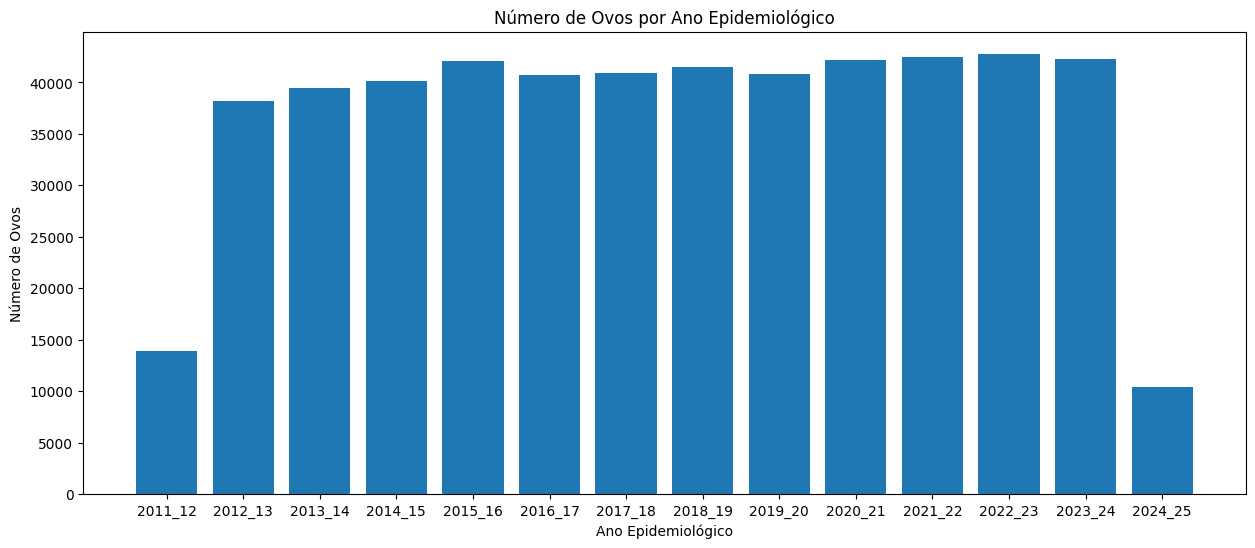

In [20]:
trap_by_year = data['anoepid'].value_counts().reset_index().sort_values('anoepid')
display(trap_by_year)

plt.figure(figsize=(15, 6))
plt.bar(trap_by_year['anoepid'], trap_by_year['count'])
plt.xlabel('Ano Epidemiológico')
plt.ylabel('Número de Ovos')
plt.title('Número de Ovos por Ano Epidemiológico')
plt.show()

### Traps by category

,GerCat,count,min,max,mean
3,A1,26758,0.0,2417.0,95.937813
0,A2,315305,0.0,4227.0,42.481055
2,B,70881,0.0,2054.0,8.977145
1,M,104855,0.0,1278.0,19.860836


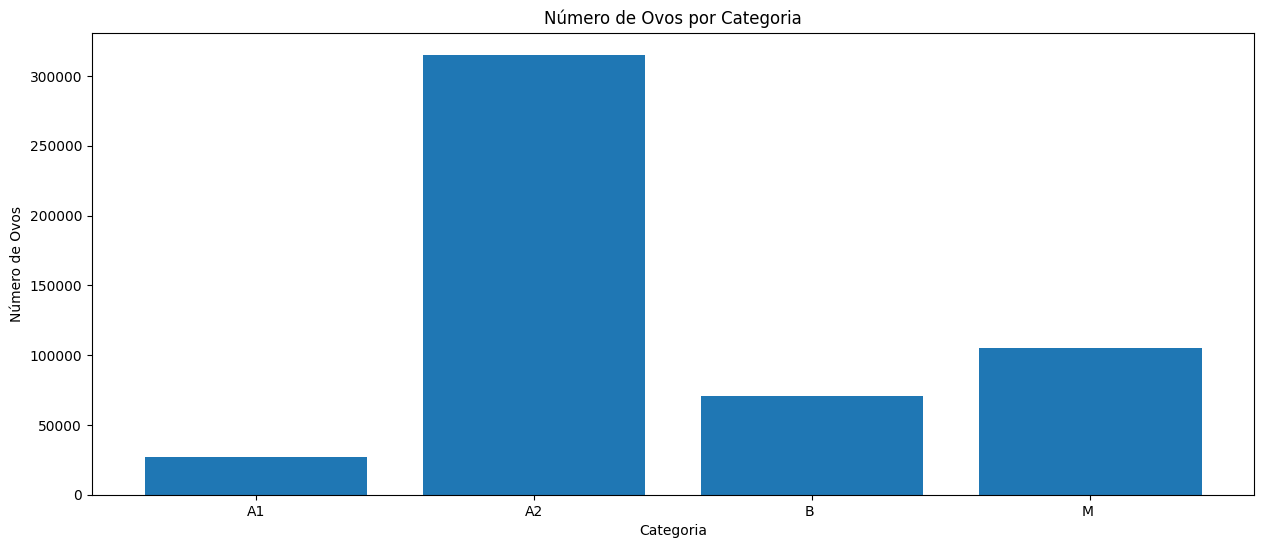

In [21]:
trap_by_cat = data['GerCat'].value_counts().reset_index().sort_values('GerCat')
trap_by_cat['min']  = [min(data[data['GerCat']==cat]['novos']) for cat in trap_by_cat['GerCat']] 
trap_by_cat['max']   = [max(data[data['GerCat']==cat]['novos']) for cat in trap_by_cat['GerCat']]
trap_by_cat['mean']  = [data[data['GerCat']==cat]['novos'].mean() for cat in trap_by_cat['GerCat']]



display(trap_by_cat)

plt.figure(figsize=(15, 6))
plt.bar(trap_by_cat['GerCat'], trap_by_cat['count'])
plt.xlabel('Categoria')
plt.ylabel('Número de Ovos')
plt.title('Número de Ovos por Categoria')
plt.show()

### Traps by region

,distrito,count
2,BARREIRO,63077
3,CENTRO-SUL,61829
7,LESTE,50862
4,NORDESTE,59096
1,NOROESTE,64465
8,NORTE,40117
6,OESTE,51752
0,PAMPULHA,74233
5,VENDA NOVA,52368


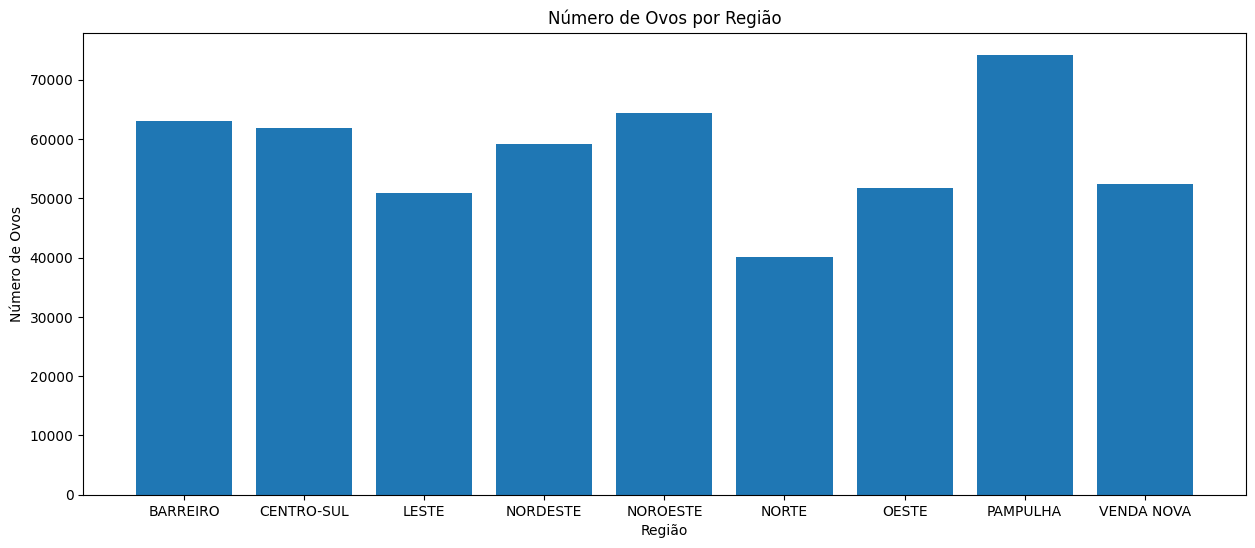

In [22]:
trap_by_reg = data['distrito'].value_counts().reset_index().sort_values('distrito')


display(trap_by_reg)

plt.figure(figsize=(15, 6))
plt.bar(trap_by_reg['distrito'], trap_by_reg['count'])
plt.xlabel('Região')
plt.ylabel('Número de Ovos')
plt.title('Número de Ovos por Região')
plt.show()

## Exploration

### Number of unique values in each column

In [24]:
unique_values = df_operations.info_dict_col(masterdata,masterdata.columns,df_operations.get_col_unique_values)
df_operations.print_info_col(unique_values,6)

exercicio [14]: [2018 2014 2023 2013 2015 2020]
nplaca [523048]: [90000140 90000215 90000156 90000012 90000272 90000184]
narmad [2066]: [901001 901002 901003 901004 901005 901006]
idarmad [2066]: [901374 901375 901376 901377 901378 901379]
endarmad [2066]: [97222 97559 97541 97149 96964 96965]
cep [1786]: [9.03069076e+09 9.03069224e+09 9.03069008e+09 9.03069075e+09
 9.03069072e+09 9.03069080e+09]
dtinstal [2696]: <DatetimeArray>
['2018-06-18 00:00:00', '2014-09-22 00:00:00', '2023-05-29 00:00:00',
 '2013-07-01 00:00:00', '2015-03-30 00:00:00', '2020-08-10 00:00:00']
Length: 6, dtype: datetime64[ns]
dtcol [2803]: <DatetimeArray>
['2018-06-25 00:00:00', '2014-09-29 00:00:00', '2023-06-05 00:00:00',
 '2013-07-08 00:00:00', '2015-04-06 00:00:00', '2020-08-17 00:00:00']
Length: 6, dtype: datetime64[ns]
semepi [50]: [125 139 122 127 113 133]
cdabrange [155]: [901460. 901400. 901300. 901260. 901250. 901290.]
abrange [154]: ['C.S.REGINA' 'C.S.LINDEIA' 'C.S.ITAIPU' 'C.S.TUNEL DE IBIRITE'
 'C.S.

In [25]:
weird_unique_values = {col:values for col,values in unique_values.items() if values.shape[0] < 10}
df_operations.print_info_col(weird_unique_values,20)

cddist [9]: [1 2 3 4 5 6 7 8 9]
eclod [6]: [nan  1.  2.  4.  3.  5.]
desid [6]: [nan  1.  5.  3.  4.  2.]
CatRC [5]: [ 2.  3.  1. nan  0.]
qarmadild [9]: [245. 217. 208. 224. 285. 178. 215. 301. 193.]
qarmadilrc [5]: [1053.  161.  766.   23.   64.]
qarmadilbh [1]: [2067.]
agintincol [4]: ['06 - 08' '01 - 05' '09 - 99' '']
ovos [3]: ['Neg' 'Pos' '']
bovos [3]: [ 0.  1. nan]
agnovos [6]: ['0000 - 0000' '0101 - 9999' '0051 - 0100' '0016 - 0050' '0001 - 0015' '']
nagnovos [6]: [ 0.  4.  3.  2.  1. nan]
catovos [3]: [ 0.  1. nan]
agovosdiacol [6]: ['000.00 - 000.00' '007.00 - 017.99' '002.00 - 006.99' ''
 '018.00 - 999.99' '000.01 - 001.99']
nagovosdiacol [6]: [ 0.  3.  2. nan  4.  1.]
season [2]: [1. 2.]
distrito [9]: ['BARREIRO' 'CENTRO-SUL' 'LESTE' 'NORDESTE' 'NOROESTE' 'NORTE' 'OESTE'
 'PAMPULHA' 'VENDA NOVA']
npesmes [3]: [2 3 1]
qaabh [1]: [154.]
qaadist [7]: [20. 12. 14. 21. 17. 18. 15.]
qaaCatRC [5]: [84. 20. 47.  3.  2.]
qquadbh [2]: [1802.   nan]
qquadist [9]: [224. 201. 189. 212.

### Sorting data columns

In [29]:
masterdata['dtinstal'].sort_values()

403650   2011-09-12
395514   2011-09-13
414143   2011-09-13
402549   2011-09-13
405603   2011-09-13
            ...    
418138   2024-08-23
412013   2024-08-23
338308   2024-08-23
418453   2024-08-23
469756   2024-08-23
Name: dtinstal, Length: 523048, dtype: datetime64[ns]

### Checking types

In [30]:
# dict containing the types of each column
col_types = df_operations.info_dict_col(masterdata, masterdata.columns, df_operations.get_col_types)
df_operations.print_info_col(col_types,20)

exercicio [1]: [<class 'int'>]
nplaca [1]: [<class 'int'>]
narmad [1]: [<class 'int'>]
idarmad [1]: [<class 'int'>]
endarmad [1]: [<class 'int'>]
cep [1]: [<class 'float'>]
dtinstal [1]: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
dtcol [1]: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
semepi [1]: [<class 'int'>]
cdabrange [1]: [<class 'float'>]
abrange [1]: [<class 'str'>]
quadra [1]: [<class 'float'>]
cdbairro [1]: [<class 'float'>]
nombairro [1]: [<class 'str'>]
cddist [1]: [<class 'int'>]
novos [1]: [<class 'float'>]
eclod [1]: [<class 'float'>]
desid [1]: [<class 'float'>]
CatRC [1]: [<class 'float'>]
qarmadila [1]: [<class 'float'>]
qarmadild [1]: [<class 'float'>]
qarmadilrc [1]: [<class 'float'>]
qarmadilbh [1]: [<class 'float'>]
dia [1]: [<class 'float'>]
mes [1]: [<class 'float'>]
ano [1]: [<class 'float'>]
intvinstcol [1]: [<class 'float'>]
agintincol [1]: [<class 'str'>]
ovos [1]: [<class 'str'>]
bovos [1]: [<class 'float'>]
agnovos [1]: [<class 'str'>]
nag

In [31]:
# dict containing the columns with more than one type
weird_type_cols = {key:value for key,value in col_types.items() if value.shape[0] > 1}
print('Columns with more than one type:')
df_operations.print_info_col(weird_type_cols,20)


print('\n Values of columns with more than one type:')
for col, value in weird_type_cols.items():
    print(f'{col} [{value.shape[0]}]: {masterdata[col].unique()[:20]}')

Columns with more than one type:

 Values of columns with more than one type:


## Processing

### Remove useless columns 

In [32]:
remove_cols = []
for col,value in unique_values.items():
     sum_dropped = 0 
     if value.shape[0] == 1:
        masterdata.drop(col, axis=1, inplace=True)
        remove_cols.append(col)
        sum_dropped += 1
for col in remove_cols:
    del unique_values[col]
    del col_types[col]

print(f'{original_shape[1] - masterdata.shape[1]} columns with only one value were dropped.')
# IND_OFICIAL char(1),[Indicativo se o endereço é oficial ou informado.]

3 columns with only one value were dropped.


### NaN Treatment

In [33]:
masterdata.isna().sum().sort_values(ascending=False)[:30]

eclod            480908
desid            456084
nagovosdiacol     10237
CatRC              6546
SumOvosP1          5290
Peso2              5290
Peso1              5290
SumOvosP2          5290
nagnovos           5249
ovosdiacol         5249
novos              5249
catovos            5249
bovos              5249
coordy             3182
coordx             3182
cdbairro            808
qquadbh             558
quadra              558
scoreG              106
semepi                0
aadist                0
quadist               0
quadaadist            0
quadaa                0
npesanoepi            0
npesano               0
npesmes               0
qaadist               0
qquadaa               0
qaaCatRC              0
dtype: int64

#### NaN means value 0

In [34]:
# IND_QTE_OVOS_ECLODIDOS, IND_QTE_OVOS_DESIDRATADOS
print('Possible values of eclod and desid:\n',
      'eclod', masterdata['eclod'].unique(),'\n',
      'desid:', masterdata['desid'].unique())

#Substituting NaN values with 0
masterdata[['eclod','desid']] = masterdata[['eclod','desid']].fillna(0)




Possible values of eclod and desid:
 eclod [nan  1.  2.  4.  3.  5.] 
 desid: [nan  1.  5.  3.  4.  2.]


#### NaN means lack of crutial information

In [35]:
nan_eggs = df_operations.print_rows_with_nan(masterdata, 'novos',True,False)
nan_eggs.isna().sum().sort_values(ascending=False)[:15]



nagovosdiacol    5249
novos            5249
SumOvosP1        5249
Peso2            5249
Peso1            5249
catovos          5249
ovosdiacol       5249
nagnovos         5249
bovos            5249
SumOvosP2        5249
scoreG             65
CatRC              38
coordx             33
coordy             33
cdbairro           14
dtype: int64

In [36]:
# other relevant columns
print((nan_eggs['eclod'] > 0).any())
print((nan_eggs['desid'] > 0).any())
print((nan_eggs['agovosdiacol']!='').sum())

False
False
0


In [37]:
masterdata.drop(nan_eggs.index, axis=0, inplace=True)

#### NaNs mean lack of irrelevant data 

####  Correct NaN values in the new coordinate columns

In [38]:
# check if there are any NaN values in the coordinate columns of the masterdata
nan_rows_coord = df_operations.print_rows_with_nan(masterdata[['narmad','coordx','coordy']], 'coordy',True)
print('All NaN values in both coordinates columns are in the same rows')

,narmad,coordx,coordy
125482,902217,NaN,NaN
125483,902217,NaN,NaN
125484,902217,NaN,NaN
125485,902217,NaN,NaN
125486,902217,NaN,NaN
...,...,...,...
523043,909195,NaN,NaN
523044,909195,NaN,NaN
523045,909195,NaN,NaN
523046,909195,NaN,NaN


All NaN values in both coordinates columns are in the same rows


In [40]:
# import files with num_armadilha and coordinates correspondence

coordArmadilhas = pd.read_excel('../data/complementar/CoordXYArmadilhas.xls')
coordOvitrampas = pd.read_excel('../data/complementar/CoordXYOvitrampas.xls')
print('Equal files?', coordArmadilhas.equals(coordOvitrampas))


Equal files? True


In [41]:
# check if traps with nan coordinates in masterdata have coordinates in coordArmadilhas
nan_rows_coord_unique = df_operations.get_col_unique_values(nan_rows_coord, 'narmad')
for narmad in nan_rows_coord_unique:
    print(df_operations.row_with_value(coordArmadilhas, 'narmad', narmad)   )

Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx

In [43]:
# Import file with coordinates in lat and long of the traps
active_traps = pd.read_excel('../data/complementar/OVITRAMPAS_ATIVAS.xlsx')
active_traps['OVITRAMPA'] = active_traps['OVITRAMPA'].apply(lambda x: int(f'90{x}')) # add 90 to the beginning of the trap number

# merge add latitude and longitute to masterdata
new_active_traps = active_traps[['OVITRAMPA','LATITUDE','LONGITUDE','X','Y']].rename(
    columns={'OVITRAMPA':'narmad', 'LATITUDE':'latitude','LONGITUDE':'longitude','X':'coordx2','Y':'coordy2'})

final_df = pd.merge(masterdata, new_active_traps, on='narmad', how='left')
# Drop the old coordinate columns. They are part of stata analysis
#final_df.drop(columns=['coordx','coordy','coordx2','coordy2'], axis=1, inplace=True) 

#TODO
# delete commas from the latitude and longitude columns
#final_df['latitude'] = final_df['latitude'].apply(lambda x: float(str(x).replace(',','')))
#final_df['longitude'] = final_df['longitude'].apply(lambda x: float(str(x).replace(',','')))

## Problems

### Traps without coordinates

In [46]:
active_traps_unique = df_operations.get_col_unique_values(active_traps,'OVITRAMPA')

nan_traps_active_traps = df_operations.print_rows_with_nan(final_df, 'coordx2',True,False)
print('Traps with NaN coordinates that are not in active_traps:')
display(nan_traps_active_traps[['narmad','coordx','coordy','coordx2','coordy2','latitude','longitude']])

Traps with NaN coordinates that are not in active_traps:


,narmad,coordx,coordy,coordx2,coordy2,latitude,longitude
61519,901223,602090.0,7786611.0,NaN,NaN,NaN,NaN
61520,901223,602090.0,7786611.0,NaN,NaN,NaN,NaN
61521,901223,602090.0,7786611.0,NaN,NaN,NaN,NaN
61522,901223,602090.0,7786611.0,NaN,NaN,NaN,NaN
61523,901223,602090.0,7786611.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
517618,909185,605780.0,7810489.0,NaN,NaN,NaN,NaN
517619,909185,605780.0,7810489.0,NaN,NaN,NaN,NaN
517620,909185,605780.0,7810489.0,NaN,NaN,NaN,NaN
517621,909185,605780.0,7810489.0,NaN,NaN,NaN,NaN


In [47]:
nan_traps_master = df_operations.print_rows_with_nan(final_df, 'coordx',True,False)
print('Traps with NaN coordinates that are not in masterdata:')
display(nan_traps_master[['narmad','coordx','coordy','coordx2','coordy2','latitude','longitude']])

Traps with NaN coordinates that are not in masterdata:


,narmad,coordx,coordy,coordx2,coordy2,latitude,longitude
124851,902217,NaN,NaN,612636.844,7795076.79,-19.937476,-43.923693
124852,902217,NaN,NaN,612636.844,7795076.79,-19.937476,-43.923693
124853,902217,NaN,NaN,612636.844,7795076.79,-19.937476,-43.923693
124854,902217,NaN,NaN,612636.844,7795076.79,-19.937476,-43.923693
124855,902217,NaN,NaN,612636.844,7795076.79,-19.937476,-43.923693
...,...,...,...,...,...,...,...
517794,909195,NaN,NaN,606973.261,7811057.92,-19.793400,-43.978730
517795,909195,NaN,NaN,606973.261,7811057.92,-19.793400,-43.978730
517796,909195,NaN,NaN,606973.261,7811057.92,-19.793400,-43.978730
517797,909195,NaN,NaN,606973.261,7811057.92,-19.793400,-43.978730


In [48]:
# check traps with nan coordinates in active_traps and masterdata
coord_prob = df_operations.print_rows_with_nan(nan_traps_active_traps, 'coordx',True,False)
print('Traps with NaN coordinates that are not in masterdata:')
display(coord_prob[['narmad','coordx','coordy','coordx2','coordy2','latitude','longitude']])
coord_prob_unique = df_operations.get_col_unique_values(coord_prob, 'narmad')

print(f'Number of samples: {coord_prob.shape[0]}')
print('Unique traps with NaN coordinates that are in masterdata:', coord_prob_unique)

Traps with NaN coordinates that are not in masterdata:


,narmad,coordx,coordy,coordx2,coordy2,latitude,longitude
234656,904210,NaN,NaN,NaN,NaN,NaN,NaN
234657,904210,NaN,NaN,NaN,NaN,NaN,NaN
234658,904210,NaN,NaN,NaN,NaN,NaN,NaN
234659,904210,NaN,NaN,NaN,NaN,NaN,NaN
234660,904210,NaN,NaN,NaN,NaN,NaN,NaN
234661,904210,NaN,NaN,NaN,NaN,NaN,NaN
234662,904210,NaN,NaN,NaN,NaN,NaN,NaN
234663,904210,NaN,NaN,NaN,NaN,NaN,NaN
234664,904210,NaN,NaN,NaN,NaN,NaN,NaN
234665,904210,NaN,NaN,NaN,NaN,NaN,NaN


Number of samples: 55
Unique traps with NaN coordinates that are in masterdata: [904210 905279 905280 905281 905282 905283 905284 905285 905286 905287
 906180]


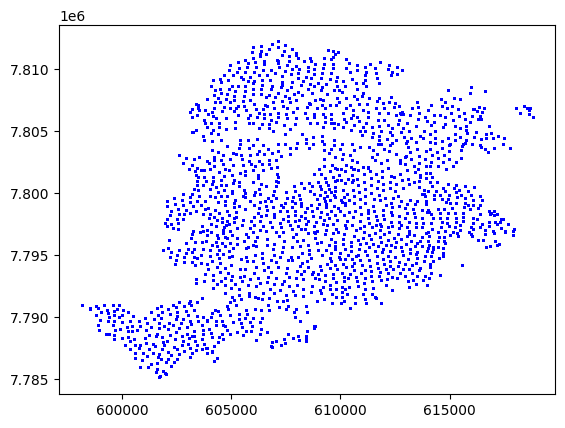

In [49]:
plt.scatter(final_df['coordx'],final_df['coordy'],c='blue',label='Old',s=1)

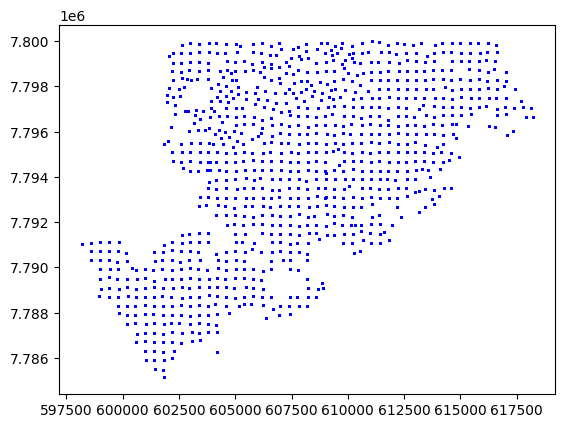

In [50]:
filter_df = final_df[(final_df['coordx2'] > 500000) & (final_df['coordx2'] < 700000) & 
                     (final_df['coordy2'] > 500000) & (final_df['coordy2'] < 7800000)]
plt.scatter(filter_df['coordx2'],filter_df['coordy2'],c='blue',label='Old',s=1)


In [51]:
# Check correlation between the two coordinate systems
print('Difference between coordinate system')
print('x:',(final_df['coordx'] - final_df['coordx2']).unique())
print('y:\n',(final_df['coordy'] - final_df['coordy2']).unique())

nan_traps_active_traps = df_operations.print_rows_with_nan(final_df, 'coordx2',True,False)


Difference between coordinate system
x: [ 375.2455 -167.623  -124.439  ... -211.369    49.952     6.57  ]
y:
 [-1263.12    205.116    54.017 ...  -156.301   -43.169    26.702]


In [52]:
y_diff = (final_df['coordy'] - final_df['coordy2']).dropna()
#plt.hist(y_diff, bins=100,range=(-100,100))
y_diff.value_counts(sort=True).iloc[:100]


 0.012      886
-0.009      604
 0.026      602
 1.029      601
-0.028      601
           ... 
-241.007    308
-2.576      308
-136.988    308
 6.284      308
 37.034     308
Name: count, Length: 100, dtype: int64

In [53]:
x_diff = (final_df['coordx'] - final_df['coordx2']).dropna()
#plt.hist(x_diff, bins=100,range=(-100,100))
x_diff.value_counts(sort=True).iloc[:100]


-0.012      887
 0.037      825
-0.036      604
 0.010      604
 1.022      599
           ... 
-42.576     307
 216.009    307
-96.957     307
 95.973     307
 66.763     307
Name: count, Length: 100, dtype: int64

In [54]:
nanx = df_operations.print_rows_with_nan(filter_df, 'coordx',True,False)
nany = df_operations.print_rows_with_nan(filter_df, 'coordy',True,False)

In [55]:
#TODO
# Create a set to store unique pairs
unique_coordinates = set()

# Iterate over the DataFrame rows and add each pair as a tuple to the set
for row in final_df.itertuples(index=False):
    if np.isnan(row.coordx) or np.isnan(row.coordy):
        continue
    pair = (row.coordx, row.coordy)
    unique_coordinates.add(pair)

# DRAFT

In [56]:
final_df.isna().sum().sort_values(ascending=False)[:30]

coordy2          49316
coordx2          49316
longitude        49316
latitude         49316
CatRC             6508
nagovosdiacol     4988
coordx            3149
coordy            3149
cdbairro           794
quadra             552
qquadbh            552
scoreG              41
Peso1               41
Peso2               41
SumOvosP1           41
SumOvosP2           41
npesmes              0
npesanoepi           0
quadaa               0
npesano              0
quinzepid            0
distrito             0
Calustro             0
quadaadist           0
quinzena             0
quadist              0
qquaCatRC            0
aadist               0
qaadist              0
qaaCatRC             0
dtype: int64